### Домашняя работа к Уроку 4
### Студент: Абрамов А.В.

#### 1. Обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers.legacy import RMSprop

import os

In [6]:
# установка параметров нейросети
batch_size = 64
num_classes = 10
epochs = 10

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [3]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
[classes[x[0]] for x in y_train[:10]]

['frog',
 'truck',
 'truck',
 'deer',
 'automobile',
 'automobile',
 'bird',
 'horse',
 'ship',
 'cat']

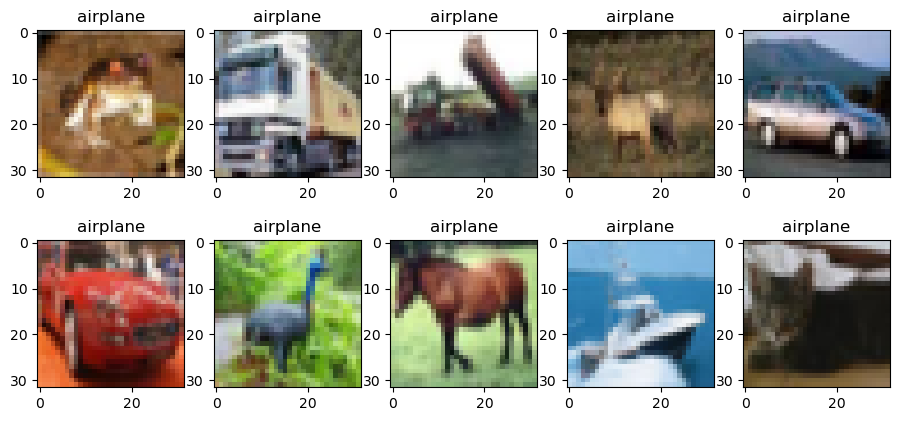

In [8]:
# посмотрим на изображения
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 5))
axes = axes.reshape(1, -1)
for i, ax in zip(range(10), axes[0]):
    ax.imshow(x_train[i])
    ax.set_title(classes[int(y_train[i][0])])
plt.show()

#### 1. Обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10

In [14]:
# конфигурирование слоев нейросети
model_1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_1.add(GlobalAveragePooling2D())
model_1.add(Dense(64))
model_1.add(Activation('relu'))
model_1.add(Dense(32))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()
# компиляция модели
model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_8 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [11]:
history_1 = model_1.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 50s 63ms/step - loss: 1.9866 - accuracy: 0.2275 - val_loss: 1.6938 - val_accuracy: 0.3432
Epoch 2/10
782/782 [==============================] - 56s 71ms/step - loss: 1.7058 - accuracy: 0.3524 - val_loss: 1.4797 - val_accuracy: 0.4404
Epoch 3/10
782/782 [==============================] - 61s 78ms/step - loss: 1.5725 - accuracy: 0.4105 - val_loss: 1.3742 - val_accuracy: 0.4890
Epoch 4/10
782/782 [==============================] - 59s 75ms/step - loss: 1.4887 - accuracy: 0.4501 - val_loss: 1.3127 - val_accuracy: 0.5196
Epoch 5/10
782/782 [==============================] - 58s 74ms/step - loss: 1.4249 - accuracy: 0.4809 - val_loss: 1.2776 - val_accuracy: 0.5374
Epoch 6/10
782/782 [==============================] - 59s 76ms/step - loss: 1.3675 - accuracy: 0.4999 - val_loss: 1.2633 - val_accuracy: 0.5435
Epoch 7/10
782/782 [==============================] - 60s 76ms/step - loss: 1.3141 - accuracy: 0.5272 - val_loss: 1.1373 - val_accuracy:

In [12]:
train_loss, train_m = model_1.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_1.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

1563/1563 - 8s - loss: 1.0153 - accuracy: 0.6356 - 8s/epoch - 5ms/step
313/313 - 2s - loss: 1.0556 - accuracy: 0.6167 - 2s/epoch - 5ms/step
train_loss: 1.0152943134307861, train_accuracy: 0.6355599761009216
test_loss: 1.0555745363235474, test_accuracy: 0.6166999936103821


In [41]:
mod1= {'Model':'Базовая модель', 'Train accuracy':0.6356, 'Test accuracy':0.6167}

#### 2. Оценить рост точности при увеличении ширины сети (больше фильтров)

In [17]:
# конфигурирование слоев нейросети
model_2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_2.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(128, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_2.add(GlobalAveragePooling2D())
model_2.add(Dense(64))
model_2.add(Activation('relu'))
model_2.add(Dense(32))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()
# компиляция модели
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation_14 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 activation_15 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 64)        0         
                                                      

In [18]:
history_2 = model_2.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 108s 137ms/step - loss: 1.9933 - accuracy: 0.2236 - val_loss: 1.7323 - val_accuracy: 0.3371
Epoch 2/10
782/782 [==============================] - 107s 137ms/step - loss: 1.6995 - accuracy: 0.3417 - val_loss: 1.4904 - val_accuracy: 0.4300
Epoch 3/10
782/782 [==============================] - 108s 138ms/step - loss: 1.5476 - accuracy: 0.4095 - val_loss: 1.3300 - val_accuracy: 0.4984
Epoch 4/10
782/782 [==============================] - 108s 138ms/step - loss: 1.4015 - accuracy: 0.4834 - val_loss: 1.2507 - val_accuracy: 0.5501
Epoch 5/10
782/782 [==============================] - 108s 138ms/step - loss: 1.2885 - accuracy: 0.5380 - val_loss: 1.0826 - val_accuracy: 0.6115
Epoch 6/10
782/782 [==============================] - 109s 140ms/step - loss: 1.2068 - accuracy: 0.5727 - val_loss: 1.0278 - val_accuracy: 0.6231
Epoch 7/10
782/782 [==============================] - 108s 139ms/step - loss: 1.1451 - accuracy: 0.5987 - val_loss: 0.9689 -

In [19]:
train_loss, train_m = model_2.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_2.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

1563/1563 - 22s - loss: 0.8664 - accuracy: 0.6885 - 22s/epoch - 14ms/step
313/313 - 5s - loss: 0.9524 - accuracy: 0.6607 - 5s/epoch - 15ms/step
train_loss: 0.8664121031761169, train_accuracy: 0.6884599924087524
test_loss: 0.9523561596870422, test_accuracy: 0.6607000231742859


In [40]:
mod2= {'Model':'Больше каналов', 'Train accuracy':0.6885, 'Test accuracy':0.6607}

#### 3. Оценить рост точности при увеличении глубины сети (больше слоев)

In [20]:
# конфигурирование слоев нейросети
model_3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_3.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))


# полносвязные слои нейронной сети
model_3.add(GlobalAveragePooling2D())
model_3.add(Dense(64))
model_3.add(Activation('relu'))
model_3.add(Dense(32))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()
# компиляция модели
model_3.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_21 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_22 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [21]:
history_3 = model_3.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 57s 72ms/step - loss: 2.0096 - accuracy: 0.2170 - val_loss: 1.7481 - val_accuracy: 0.3533
Epoch 2/10
782/782 [==============================] - 56s 72ms/step - loss: 1.6505 - accuracy: 0.3831 - val_loss: 1.3744 - val_accuracy: 0.4988
Epoch 3/10
782/782 [==============================] - 56s 72ms/step - loss: 1.4391 - accuracy: 0.4833 - val_loss: 1.2948 - val_accuracy: 0.5146
Epoch 4/10
782/782 [==============================] - 56s 72ms/step - loss: 1.3185 - accuracy: 0.5348 - val_loss: 1.1021 - val_accuracy: 0.6037
Epoch 5/10
782/782 [==============================] - 56s 71ms/step - loss: 1.2141 - accuracy: 0.5756 - val_loss: 1.0655 - val_accuracy: 0.6285
Epoch 6/10
782/782 [==============================] - 53s 68ms/step - loss: 1.1426 - accuracy: 0.6092 - val_loss: 0.9904 - val_accuracy: 0.6564
Epoch 7/10
782/782 [==============================] - 53s 67ms/step - loss: 1.0824 - accuracy: 0.6287 - val_loss: 0.9888 - val_accuracy:

In [22]:
train_loss, train_m = model_3.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_3.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

1563/1563 - 10s - loss: 0.7388 - accuracy: 0.7422 - 10s/epoch - 6ms/step
313/313 - 2s - loss: 0.8325 - accuracy: 0.7118 - 2s/epoch - 6ms/step
train_loss: 0.738783597946167, train_accuracy: 0.7422000169754028
test_loss: 0.8325347900390625, test_accuracy: 0.7117999792098999


In [39]:
mod3 = {'Model':'Больше слоев', 'Train accuracy':0.7422, 'Test accuracy':0.7118}

#### 4. Оценить рост точности при увеличении и глубины и ширины сети

In [23]:
# конфигурирование слоев нейросети
model_4 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_4.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_4.add(Activation('relu'))
model_4.add(Conv2D(64, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(128, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(Conv2D(128, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(128, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(Conv2D(128, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))


# полносвязные слои нейронной сети
model_4.add(GlobalAveragePooling2D())
model_4.add(Dense(64))
model_4.add(Activation('relu'))
model_4.add(Dense(32))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.summary()
# компиляция модели
model_4.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_30 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 activation_31 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 15, 15, 64)        0         
                                                      

In [24]:
history_4 = model_4.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 115s 145ms/step - loss: 1.9440 - accuracy: 0.2614 - val_loss: 1.5412 - val_accuracy: 0.4391
Epoch 2/10
782/782 [==============================] - 115s 147ms/step - loss: 1.5532 - accuracy: 0.4303 - val_loss: 1.2595 - val_accuracy: 0.5352
Epoch 3/10
782/782 [==============================] - 114s 146ms/step - loss: 1.3361 - accuracy: 0.5287 - val_loss: 1.1873 - val_accuracy: 0.5805
Epoch 4/10
782/782 [==============================] - 117s 150ms/step - loss: 1.1907 - accuracy: 0.5852 - val_loss: 1.0664 - val_accuracy: 0.6271
Epoch 5/10
782/782 [==============================] - 119s 152ms/step - loss: 1.0875 - accuracy: 0.6272 - val_loss: 0.9291 - val_accuracy: 0.6796
Epoch 6/10
782/782 [==============================] - 120s 153ms/step - loss: 0.9988 - accuracy: 0.6620 - val_loss: 0.8407 - val_accuracy: 0.7128
Epoch 7/10
782/782 [==============================] - 120s 153ms/step - loss: 0.9434 - accuracy: 0.6798 - val_loss: 0.8696 -

In [25]:
train_loss, train_m = model_4.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_4.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

1563/1563 - 25s - loss: 0.5857 - accuracy: 0.7947 - 25s/epoch - 16ms/step
313/313 - 5s - loss: 0.7514 - accuracy: 0.7489 - 5s/epoch - 16ms/step
train_loss: 0.5857173204421997, train_accuracy: 0.7946799993515015
test_loss: 0.7514444589614868, test_accuracy: 0.7488999962806702


In [70]:
mod4 = {'Model':'Больше каналов и  слоев', 'Train accuracy':0.7947, 'Test accuracy':0.7489}

In [72]:
table = pd.DataFrame([mod1, mod2, mod3, mod4])
table

,Model,Train accuracy,Test accuracy
0,Базовая модель,0.6356,0.6167
1,Больше каналов,0.6885,0.6607
2,Больше слоев,0.7422,0.7118
3,Больше каналов и слоев,0.7947,0.7489


### Вывод: из сводной таблицы видно увеличение числа каналов по сравнению с базовой моделью привело к росту точности. К еще большему росту точности привело увеличение кол-ва слоев по сравнению с базовой моделью. Но максимального прироста точности удалось добиться при увеличении кол-ва и каналов, и слоев, что в принципе согласуется с предположениями о связи сложности нейросети и ее качественных показателей.